# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [11]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key)

In [12]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [13]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [14]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)   

In [15]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments) 

In [16]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.099488,0.071670,0.043210,0.885090
std,0.400336,0.063418,0.053736,0.074058
min,-0.778300,0.000000,0.000000,0.718000
25%,-0.128000,0.000000,0.000000,0.845000
50%,0.000000,0.072000,0.000000,0.873000
75%,0.430825,0.103250,0.084500,0.930000
max,0.848100,0.282000,0.187000,1.000000


In [17]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.185634,0.081900,0.034220,0.883860
std,0.409242,0.075146,0.057021,0.088738
min,-0.913600,0.000000,0.000000,0.682000
25%,0.000000,0.000000,0.000000,0.835000
50%,0.173350,0.076500,0.000000,0.903000
75%,0.525875,0.135250,0.057500,0.949500
max,0.867600,0.270000,0.312000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Based on the results Ethereum had the highest 'mean positive score'.

Q: Which coin had the highest compound score?

A: Bitcoin and Ethereum had the highest compound score at 100

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [35]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [36]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()


# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [37]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)  
   
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]   
    
   
    # Convert the words to lowercase
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    words = word_tokenize(re_clean)
    
    return output

In [41]:
# Create a new tokens column for Bitcoin
nltk.download('wordnet')

bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,compound,positive,negative,neutral,tokens
0,"Mr. Spiekers most prominent customer, whom he ...",-0.2280,0.072,0.097,0.831,"[mr., spiekers, prominent, customer, ,, descri..."
1,"Bitcoin hit a milestone Friday ""that gets the ...",-0.4215,0.000,0.076,0.924,"[bitcoin, hit, milestone, friday, ``, get, wor..."
2,"Other fund vehicles hold crypto directly, but ...",-0.1154,0.116,0.154,0.730,"[fund, vehicle, hold, crypto, directly, ,, the..."
3,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000,"[russia, invaded, ukraine, ,, niki, proshin, w..."
4,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",0.4939,0.123,0.000,0.877,"[san, salvador, ,, march, 23, (, reuters, ), -..."


In [39]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,text,compound,positive,negative,neutral,tokens
0,Digital thieves just pulled off another major ...,-0.5106,0.000,0.102,0.898,"[digital, thief, pulled, another, major, crypt..."
1,His name is Vitalik Buterin and after dedicati...,0.0000,0.000,0.000,1.000,"[name, vitalik, buterin, dedicating, cover, re..."
2,"It seems that in 2022, you cant escape from th...",-0.1326,0.000,0.044,0.956,"[seems, 2022, ,, cant, escape, metaverse, ., f..."
3,"If it sounds too good to be true, youre not wr...",0.8340,0.236,0.050,0.713,"[sound, good, true, ,, youre, wrong, ., yield,..."
4,We are excited to bring Transform 2022 back in...,0.8555,0.251,0.000,0.749,"[excited, bring, transform, 2022, back, in-per..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [42]:
from collections import Counter
from nltk import ngrams

In [48]:
# Generate the Bitcoin N-grams where N=2
btc_ngram = ngrams(tokenizer(bitcoin_df.text.str.cat()), n=2)
Counter(btc_ngram).most_common(15)


[(('char', ']'), 98),
 (('(', 'reuters'), 34),
 (('reuters', ')'), 34),
 ((')', '-'), 34),
 ((',', 'march'), 24),
 (('…', '['), 20),
 ((']', 'march'), 9),
 ((']', 'london'), 9),
 (('london', ','), 9),
 (('-', 'bitcoin'), 7),
 (('march', '22'), 7),
 (('22', '('), 7),
 (('el', 'salvador'), 6),
 (('bitcoin', ','), 6),
 ((',', 'according'), 6)]

In [49]:
# Generate the Ethereum N-grams where N=2
ethereum_ngram = ngrams(tokenizer(ethereum_df.text.str.cat()), n=2)
Counter(ethereum_ngram).most_common(15)

[(('char', ']'), 97),
 (('…', '['), 24),
 (('%', ')'), 9),
 ((',', '…'), 8),
 (('ethereum', '('), 7),
 (('(', 'eth'), 7),
 (('hit', '$'), 6),
 (('(', 'reuters'), 6),
 (('reuters', ')'), 6),
 ((')', '-'), 6),
 (('world', "'s"), 6),
 ((']', 'personal'), 6),
 (('personal', 'finance'), 6),
 (('finance', 'insider'), 6),
 (('insider', 'writes'), 6)]

In [50]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [51]:
# Get the top 10 words for Bitcoin
top_btc_wrds = tokenizer(bitcoin_df.text.str.cat())
token_count(top_btc_wrds, 10)

[(',', 176),
 ('[', 98),
 ('char', 98),
 (']', 98),
 ('.', 77),
 ('bitcoin', 49),
 ('(', 45),
 (')', 44),
 ('reuters', 35),
 ('-', 35)]

In [52]:
# Get the top 10 words for Ethereum
top_eth_wrds = tokenizer(ethereum_df.text.str.cat())
token_count(top_eth_wrds, 10)

[(',', 182),
 ('.', 103),
 ('[', 98),
 (']', 98),
 ('char', 97),
 ('ha', 29),
 ('(', 26),
 ("'s", 26),
 ('$', 25),
 (')', 25)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

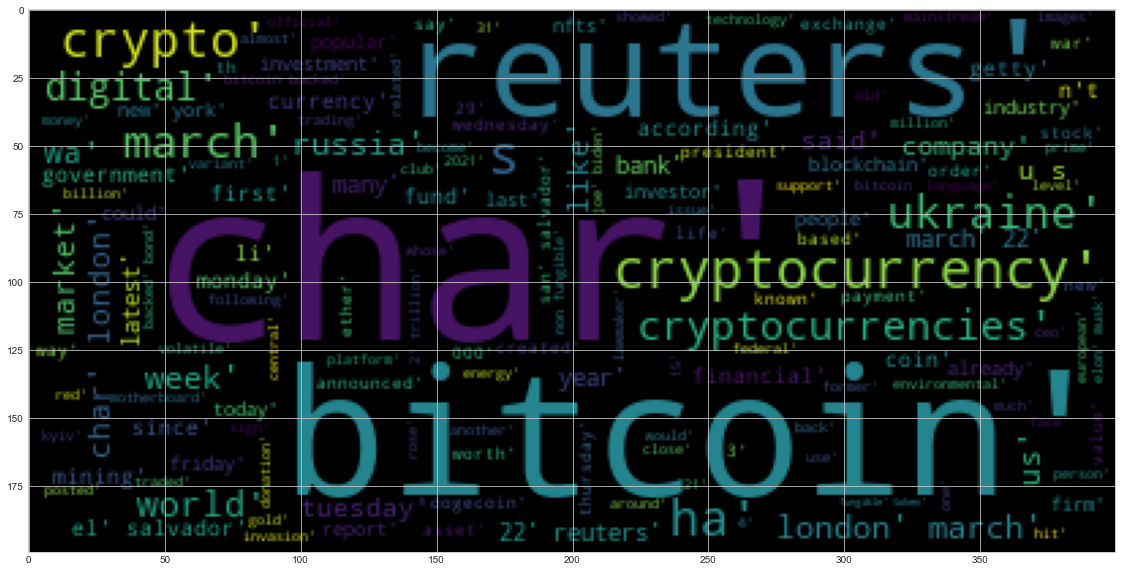

In [54]:
# Generate the Bitcoin word cloud
btc_wc = bitcoin_df['tokens'].astype(str)
b_wc = WordCloud().generate(' '.join(btc_wc))
plt.imshow(b_wc)

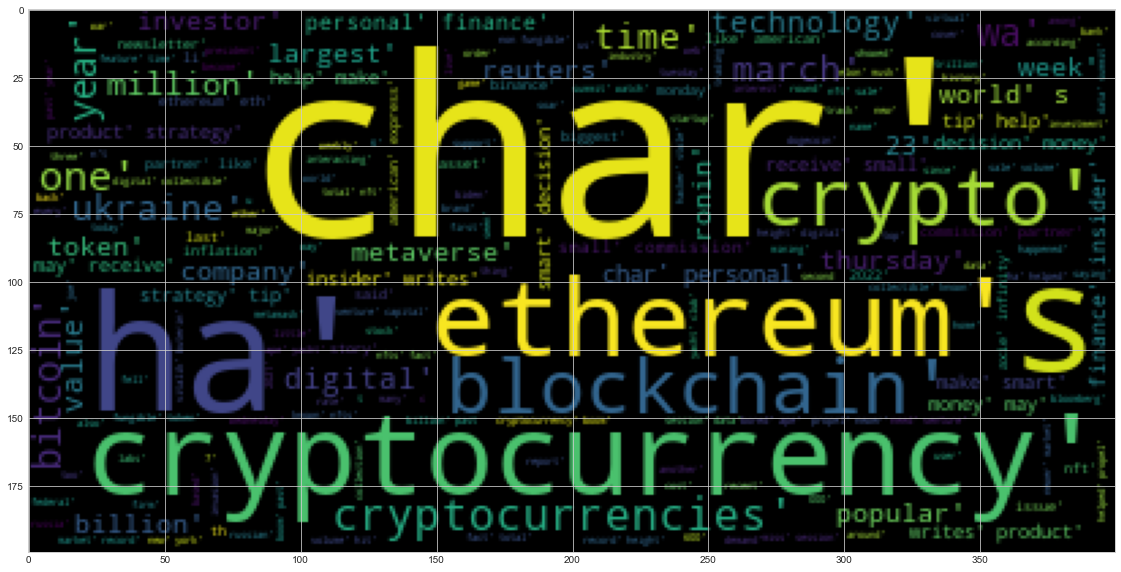

In [55]:
# Generate the Ethereum word cloud
eth_wc = ethereum_df['tokens'].astype(str)
e_wc = WordCloud().generate(' '.join(eth_wc))
plt.imshow(e_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [56]:
import spacy
from spacy import displacy

In [57]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 13.9/13.9 MB 1.5 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-04-03 12:46:45.859439: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-03 12:46:45.859469: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [58]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [59]:
# Concatenate all of the Bitcoin text together
all_btc_text = bitcoin_df['text'].str.cat()
all_btc_text[:1000]

'Mr. Spiekers most prominent customer, whom he described as his whale client, was the Eastern European organized crime member, prosecutors said. Mr. Spieker laundered $620,000 for the client, they sai… [+2755 chars]Bitcoin hit a milestone Friday "that gets the world ever closer to the moment when the final new bitcoin will enter the world," reports Axios. "The supply of coins broke 19 million...""Bitcoin is har… [+641 chars]Other fund vehicles hold crypto directly, but theyre grappling with different structural problems and carry higher fees, which are a drag on returns.\r\nGrayscale Bitcoin Trust, the largest Bitcoin veh… [+2273 chars]When Russia invaded Ukraine, Niki Proshin was already a year into making a living as a vlogger — he had a YouTube channel, a TikTok channel, and an Instagram. He also ran an online Russian club for a… [+5883 chars]SAN SALVADOR, March 23 (Reuters) - El Salvador is seeking support from cryptocurrency exchange Binance for its implementation of bitcoin as le

In [60]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "BTC NER WORD CLOUD"

In [61]:
# Render the visualization
displacy.render(doc, style='ent')

In [62]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_])

['Spiekers', 'Eastern European', 'Spieker', '620,000', 'Friday', 'Axios', '19 million', 'Grayscale Bitcoin Trust', 'Russia', 'Ukraine', 'Niki Proshin', 'a year', 'YouTube', 'TikTok', 'Instagram', 'Russian', 'March 23', 'Reuters', 'El Salvador', 'Binance', 'Central', 'the New York Times', '27', 'Reuters', '4.41%', '46,499.29', 'Sunday', '1,963.64', 'Bitcoin', '41.1%', 'Reuters', 'Satoshi Nakamoto', '2008', 'Nonfungible Tidbits', 'this week', 'Russia', 'Ukraine', 'Ukrainians', 'Russian', '+3275', 'this week', 'Getty\r\nWelcome to', 'Nonfungible Tidbits', 'weekly', 'this week', 'March 4', 'Reuters', 'Russia', 'Ukraine', 'Russia', 'March 31', 'Reuters', 'European Union', 'Thursday', 'March 22', 'Reuters', 'El Salvador', 'last week', 'finan', 'Reuters', 'first quarter', '$2 trillion', '15', 'Reuters', 'U.S.', 'Joe Biden', 'chars]KENNERDELL', 'Pa.', 'March 21', 'Reuters', 'March 22', 'Reuters', 'Tuesday', 'almost three weeks', 'Russia', 'Ukraine', 'March 29', 'Reuters', 'Tuesday', 'this year

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
all_eth_text = ethereum_df['text'].str.cat()
all_eth_text[:1000]

In [32]:
# Run the NER processor on all of the text
doc = nlp(all_eth_text)

# Add a title to the document
doc.user_data["title"] = "ETHEREUM NER WORD CLOUD"

In [64]:
# Render the visualization
displacy.render(doc, style='ent')

In [65]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_])

['Spiekers', 'Eastern European', 'Spieker', '620,000', 'Friday', 'Axios', '19 million', 'Grayscale Bitcoin Trust', 'Russia', 'Ukraine', 'Niki Proshin', 'a year', 'YouTube', 'TikTok', 'Instagram', 'Russian', 'March 23', 'Reuters', 'El Salvador', 'Binance', 'Central', 'the New York Times', '27', 'Reuters', '4.41%', '46,499.29', 'Sunday', '1,963.64', 'Bitcoin', '41.1%', 'Reuters', 'Satoshi Nakamoto', '2008', 'Nonfungible Tidbits', 'this week', 'Russia', 'Ukraine', 'Ukrainians', 'Russian', '+3275', 'this week', 'Getty\r\nWelcome to', 'Nonfungible Tidbits', 'weekly', 'this week', 'March 4', 'Reuters', 'Russia', 'Ukraine', 'Russia', 'March 31', 'Reuters', 'European Union', 'Thursday', 'March 22', 'Reuters', 'El Salvador', 'last week', 'finan', 'Reuters', 'first quarter', '$2 trillion', '15', 'Reuters', 'U.S.', 'Joe Biden', 'chars]KENNERDELL', 'Pa.', 'March 21', 'Reuters', 'March 22', 'Reuters', 'Tuesday', 'almost three weeks', 'Russia', 'Ukraine', 'March 29', 'Reuters', 'Tuesday', 'this year

---